[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)][1]

[1]: https://colab.research.google.com/github/psse-cpu/ml-workshop/blob/main/notebooks/workshop-templates/binary-classification.ipynb

In [25]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

We are going to load a CSV file using [pandas](https://pandas.pydata.org/).  The CSV file contains
two examination scores, with 100 training samples in all.  Each is labelled as:
- $1$ for **ADMITTED**
- $0$ for **NOT ADMITTED**

If you want to open the CSV file in your favorite spreadsheet, the link is [here](https://raw.githubusercontent.com/psse-cpu/ml-workshop/main/notebooks/playgrounds/admission-results.csv).

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/psse-cpu/ml-workshop/main/notebooks/playgrounds/admission-results.csv')
df

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


Let's see the first 10 of those who are admitted, and convert to NumPy ASAP.  Let's not be
overly friendly with this stranger library `pandas` for now 🐼.

In [27]:
admitted = df.query('Admitted == 1').to_numpy()
admitted[0:10]

array([[60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ],
       [61.10666454, 96.51142588,  1.        ],
       [75.02474557, 46.55401354,  1.        ],
       [76.0987867 , 87.42056972,  1.        ],
       [84.43281996, 43.53339331,  1.        ],
       [82.30705337, 76.4819633 ,  1.        ],
       [69.36458876, 97.71869196,  1.        ],
       [53.97105215, 89.20735014,  1.        ],
       [69.07014406, 52.74046973,  1.        ]])

Let's count how many were admitted.  Just see the matrix size _"na lang"_.

In [28]:
admitted.shape

(60, 3)

Let's get those who were not admitted, the last 10 this time.

In [29]:
not_admitted = df.query('Admitted == 0').to_numpy()
not_admitted[-11:-1]

array([[56.2538175 , 39.26147251,  0.        ],
       [30.05882245, 49.59297387,  0.        ],
       [44.66826172, 66.45008615,  0.        ],
       [66.56089447, 41.09209808,  0.        ],
       [49.07256322, 51.88321182,  0.        ],
       [32.72283304, 43.30717306,  0.        ],
       [60.45555629, 42.50840944,  0.        ],
       [82.22666158, 42.71987854,  0.        ],
       [42.07545454, 78.844786  ,  0.        ],
       [52.34800399, 60.76950526,  0.        ]])

Should be a $40x3$ matrix right?

In [30]:
not_admitted.shape

(40, 3)

Let's plot to make sure that the boundary is linear.  As seen in the slides, some datasets have other shapes like polynomial, circle, strange curves, etc.

What's nice with classification problems is that we can use two variables:
- $x_1$ on the X-axis
- $x_2$ on the Y-axis
- and use a different color or symbol depending on $y$ is $1$ or $0$ 😂

3 variables $x_1$, $x_2$, and $y$ will normally be a 3D graph.

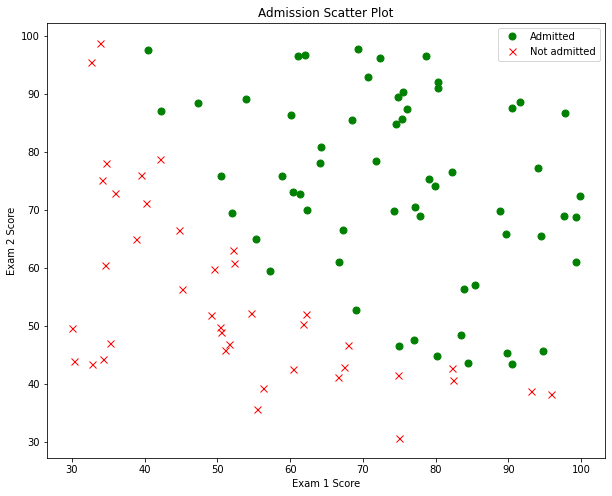

In [31]:
plt.rcParams["figure.figsize"] = [10, 8] # bigger plot

plt.plot(admitted[:, [0]], admitted[:, [1]], 'go', markersize=7, label="Admitted")
plt.plot(not_admitted[:, [0]], not_admitted[:, [1]], 'rx', markersize=7, label="Not admitted")
plt.title('Admission Scatter Plot')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend()

Yup, a straight line would cause a 
- few red crosses to spill over the right side of the boundary
- few green dots to spill over the left side

but overall it should be an okay-ish 👌 approximation right?

We only needed the `admitted` and `not_admitted` variables for graphing.  For training our model, we'll still use `X` and `y`.  I'm in a good mood 🕺🕺, so I'll do it for you.

$X$ should be a $100x2$ matrix.

In [32]:
X = df[['Exam 1', 'Exam 2']].to_numpy()
X.shape, X[0:10]

((100, 2),
 array([[34.62365962, 78.02469282],
        [30.28671077, 43.89499752],
        [35.84740877, 72.90219803],
        [60.18259939, 86.3085521 ],
        [79.03273605, 75.34437644],
        [45.08327748, 56.31637178],
        [61.10666454, 96.51142588],
        [75.02474557, 46.55401354],
        [76.0987867 , 87.42056972],
        [84.43281996, 43.53339331]]))

$y$ should be a $100x1$ vector.

In [33]:
y = df[['Admitted']].to_numpy()
y.shape, y[0:10]

((100, 1),
 array([[0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1]]))

And we say goodbye to 🐼 Pandas. Remember to **feature scale**.

# YOUR TURN

In [34]:
# SCALE X HERE
X_norm = X
X_norm[0:5]

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644]])

In [35]:
# BUILD AND TRAIN YOUR CLASSIFIER HERE

Create your predict function here.  It should output a 1 if the probability of **Admission** is 50% or more.

In [36]:
def normalize_and_predict(input):
    pass # normalize first, then predict.  It'll be slightly different from the slides.

In [37]:
applicant_scores = np.array([
    [100, 100], # wow perfect
    [30, 30],   # wow lowest in both
    [30, 60],   # lowest + kabit
    [70, 35],   # average score + quite low
    [50, 50],   # kabit?
    [65, 55],   # kabit++?
    [65, 65],   # labaw lang gamay sa kabit?
    [85, 80],   # below genius
])

"""
I got the following:
array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True]])

Makes sense to me.
"""

normalize_and_predict(applicant_scores)

Now we'll rerun the entire training set against our ML model.  Tensorflow can also calculate this _"accuracy"_ metric for us, but we'll learn this in the next lesson.

I got a value of $92\%$ here, using:
- learning rate $\alpha = 0.1$
- epochs = 300

It means 92% of its predictions match the original label $y$.

In [38]:
# no need to divide by `y.size * 100` since there are 100 training samples!
# np.sum just adds all the 1s and 0s in this 100x1 vector.
np.sum(normalize_and_predict(X) == y)

0

Not bad.  It will make tons of wrong predictions at the boundary line since they're the _50-50_ types.

92% means it made 8 mistakes.  You could see its 8 mistakes here, with the green dots and red crosses on the wrong side, and are a few that are _very close to OR somehow stepping on the line._  ***The boundary might even be a curve!***

**⚠ Spoiler**: We can fix that next lesson to achieve $100\%$ accuracy. 😂

```
Epoch 1999/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0206 - accuracy: 1.0000
Epoch 2000/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0187 - accuracy: 1.0000
```

**End Spoiler**

![graph](graph.jpg)

Also, many tutorials [like this](https://www.johnwittenauer.net/machine-learning-exercises-in-python-part-3/)
or [this](https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-logistic-regression-c0ae25509feb) that write this classifier from scratch without Tensorflow get an accuracy of $89\%$, using the
**exact same data set** from [Coursera's Machine Learning course](https://www.coursera.org/learn/machine-learning).

# 🤗

**P.S.** Graphing is out of scope for the workshop, although I shared some in the notebook.

If you're interested in this graph with the boundary line, I can share the code as well.